# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\nikit\AppData\Local\Temp\ipykernel_11716\3107362156.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


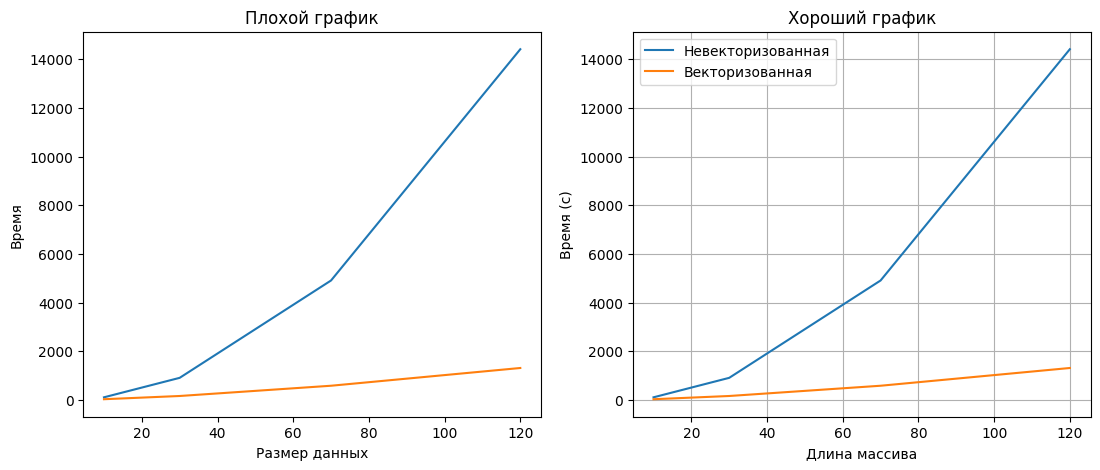

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

0.06786317948764357

0.06786317948764357


C:\Users\nikit\AppData\Local\Temp\ipykernel_11716\2204887721.py:19: RuntimeWarning: overflow encountered in scalar multiply
  res *= ms[i][i]


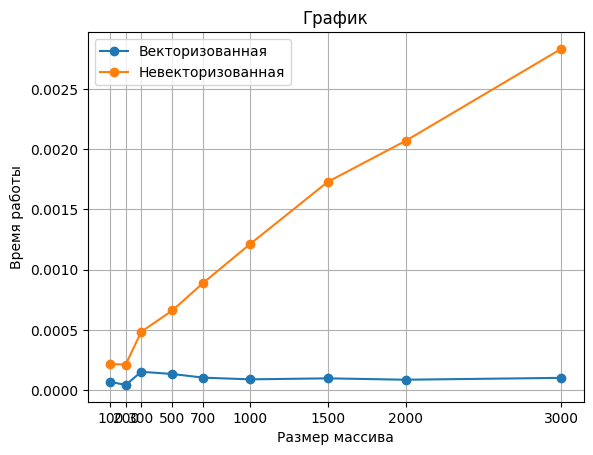

In [42]:
# code here
import random
import time
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

def prod_non_zero_diag(ms):
    res = 1
    for i in range(min(len(ms), len(ms[0]))):
        if(ms[i][i] != 0):
            res *= ms[i][i]
    return res



def prod_non_zero_diag_vect(ms):
    a = np.diag(ms)
    return a[a != 0].prod()

ms = np.random.rand(x, y)

    
print(prod_non_zero_diag(ms))
print("")
    
start_time = time.time()
    
print(prod_non_zero_diag_vect(ms))

size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    ms = np.random.randint(-10, 10, (size_a, size_a))
    start_time = time.time()
    prod_non_zero_diag(ms)
    non_v =  time.time() - start_time
    start_time = time.time()
    prod_non_zero_diag_vect(ms)
    v = time.time() - start_time
    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


True 
 True


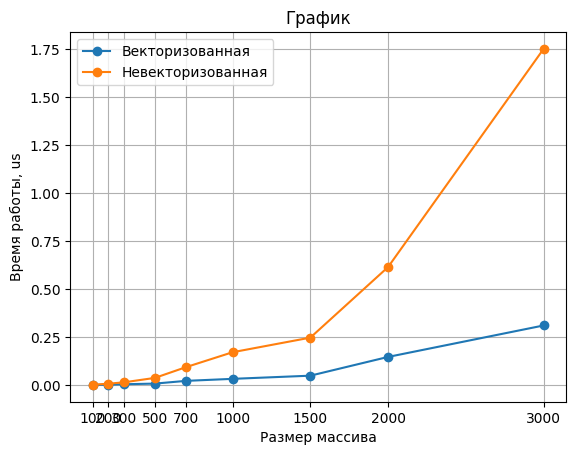

In [50]:
# code here
import numpy as np
import random

random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

ms_1 = [1, 2, 3, 4]
ms_2 = [2, 3, 1, 4]


def are_multisets_equal(ms_1, ms_2):
    if(len(ms_1) != len(ms_2)):
        return False
    ms_1.sort()
    ms_2.sort()
    for i in range(len(ms_1)):
        if(ms_1[i] != ms_2[i]):
            return False
    return True

def are_multisets_equal_vect(ms_1, ms_2):
    ms_1_n, ms_1_c = np.unique(ms_1, return_counts=True)
    ms_2_n, ms_2_c = np.unique(ms_2, return_counts=True)
    arr = [True]
    new_arr = np.where((np.shape(ms_1_n) != np.shape(ms_2_n) or np.any(ms_1_n != ms_2_n) or np.any(ms_1_c !=ms_2_c)), False, arr)
    return new_arr[0]



print(are_multisets_equal(ms_1, ms_2), '\n', are_multisets_equal_vect(ms_1, ms_2))

size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    ms_1 = np.random.randint(-10, 10, (size_a, size_a))
    ms_2 = np.random.randint(-10, 10, (size_a, size_a))

    start_time = time.time()

    are_multisets_equal(ms_1.tolist(), ms_2.tolist())
 
    non_v =  time.time() - start_time

    start_time = time.time()

    are_multisets_equal_vect(ms_1, ms_2)
    v = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

5 
 5


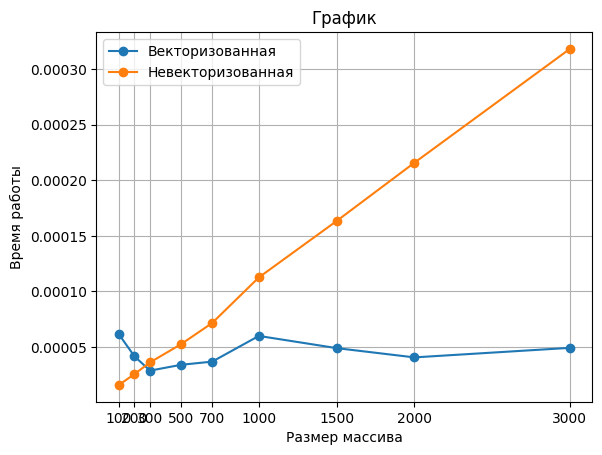

In [2]:
# code here

import numpy as np
import random
import time
%matplotlib inline
import matplotlib.pyplot as plt

random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

ms = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])


def max_after_zero(ms):
    a = list()
    for i in range(1, len(ms)):
        if((ms[i - 1] == 0)):
            a.append(ms[i])
    return max(a)

def max_after_zero_vect(ms):
    num = np.where(ms[:len(ms) - 1] == 0)
    num = np.array(num) + 1
    return np.max(ms[(num.tolist())])



print(max_after_zero(ms), '\n', max_after_zero_vect(ms))

size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    ms = np.random.randint(-10, 10, (size_a))

    start_time = time.time()

    max_after_zero(ms.tolist())
 
    non_v =  time.time() - start_time

    start_time = time.time()

    max_after_zero_vect(ms)
    v = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


C:\Users\nikit\AppData\Local\Temp\ipykernel_3232\1595043526.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


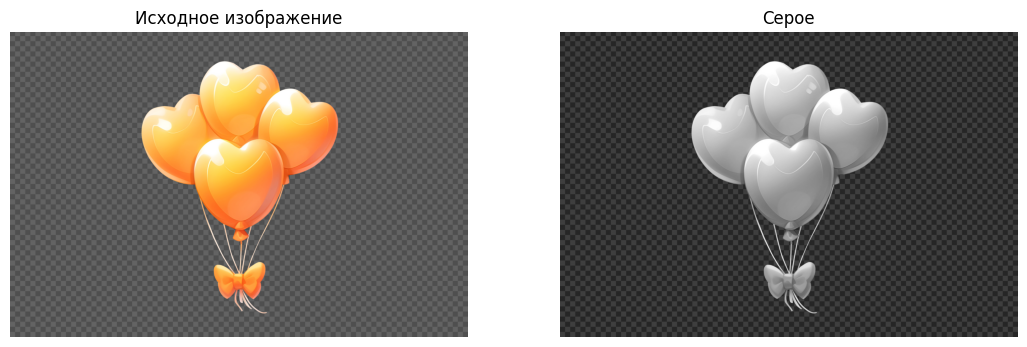

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
import numpy as np

%matplotlib inline

def convert_image_vect(img, coefs):
    return np.sum(img * coefs, axis=-1)

def convert_image(img, coefs):
    height = len(img)
    width = len(img[0])
    result_img = list()
    for i in range(height):
        curr_str = list()
        for j in range(width):
            sum = 0
            for k in range(len(coefs)):
                sum += img[i][j][k] * coefs[k]
            curr_str.append(sum)
        result_img.append(curr_str)
    return result_img



img = imread('3d_yellow_heart_shape_balloons.jpg')
coefs = np.array([0.2989, 0.5870, 0.1140])
img_grey = convert_image_vect(img, coefs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.imshow(img)
ax1.set_title('Исходное изображение')
ax1.axis('off')
ax2.imshow(img_grey, cmap='gray')
ax2.set_title('Серое')
ax2.axis('off')

fig.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

([np.float64(0.44486078298463505), np.float64(0.14295711274330802), np.float64(0.5447231279594242), np.float64(0.40430831540720735), np.float64(0.8826203229158563), np.float64(0.03340484837404689), np.float64(0.37110609513990167), np.float64(0.12197437423233048), np.float64(0.22240156273038347)], [1, 1, 1, 1, 1, 1, 1, 1, 1]) (array([0.44486078, 0.14295711, 0.54472313, 0.40430832, 0.88262032,
       0.03340485, 0.3711061 , 0.12197437, 0.22240156]), array([1, 1, 1, 1, 1, 1, 1, 1, 1]))


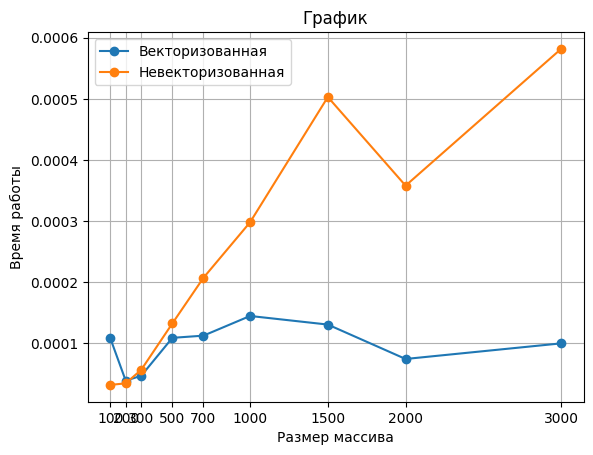

In [ ]:
# code here

import numpy as np
import random

random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

ms = np.random.rand(x)


def run_length_encoding(ms):
    a = [ms[0]]
    b = list()
    k = 1
    for i in range(1, len(ms)):
        if(ms[i - 1] == ms[i]):
            k = k + 1
        else:
            a.append(ms[i])
            b.append(k)
            k = 1
    b.append(k)
    return a, b

def run_length_encoding_vect(ms):
    a = np.hstack((np.ones(1), ms[:- 1]))
    f = ms != a
    f[0] = True
    i_1 = np.arange(np.size(ms))[f]
    i_2 = np.hstack((i_1[1:], np.array([np.size(ms)])))
    return ms[f], i_2 - i_1

print(run_length_encoding(ms), run_length_encoding_vect(ms))


size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    ms = np.random.randint(-10, 10, (size_a))

    start_time = time.time()
    run_length_encoding(ms.tolist())
    non_v =  time.time() - start_time

    start_time = time.time()
    run_length_encoding_vect(ms)
    v = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

[[0.471018238291109, 1.0131713147687635, 1.1130224767413408, 1.2491608416582543, 1.0113129621972474, 0.8281990543128054, 0.650659860501824], [1.2748631984428014, 0.9707945433410499, 1.3544550708742713, 1.0976460149842058, 1.2692474489813257, 1.2577043408926871, 1.3374380964015644], [0.6902314171093248, 0.991562845940056, 1.132290316405494, 0.8403142074486636, 0.9323567495526126, 0.8786491277843245, 0.9269090995041009], [1.112013563946497, 1.078122601839392, 1.1597077438138568, 1.160964926135437, 1.458523013935492, 1.2352732831965885, 1.1255674377243914], [1.1337875219122322, 0.40197948689376095, 1.0328995040309337, 0.8266288580789675, 0.8718368246870306, 1.215954001065068, 0.9915932507204842], [0.7818343543733465, 0.8907914044894103, 1.0043051972016066, 0.9766393808632045, 1.1072150913931331, 0.929338849819439, 0.7616098035767591], [0.7408817259249274, 0.6949928826020786, 0.8756018720660124, 0.9764408350220474, 0.7969006561552459, 0.8496058195276518, 0.6839760092983992]] 
 [[0.47101824

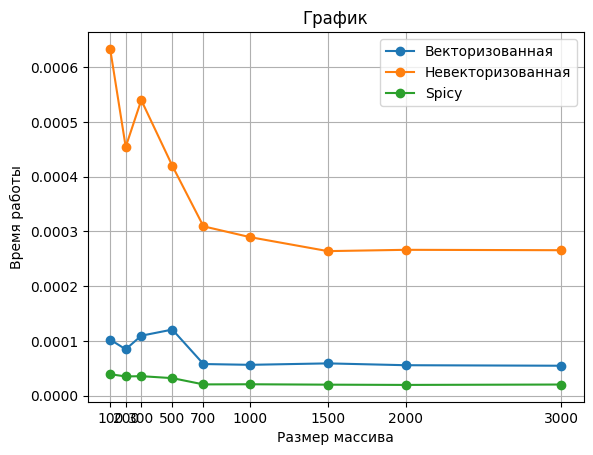

In [9]:
# code here
import numpy as np
import random
import math
from scipy.spatial import distance

random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

ms1 = np.random.rand(x, y)
ms2 = np.random.rand(x, y)

def pairwise_distance(ms1, ms2):
    res = list()
    for i in range(len(ms1)):
        a = list()
        for j in range(len(ms2)):
            b = 0
            for k in range(len(ms1[0])):
                b += (ms1[i][k] - ms2[j][k]) ** 2
            a.append(math.sqrt(b))
        res.append(a)
    return res

def pairwise_distance_vect(ms1, ms2):
    return np.sqrt(np.sum((ms1[:, np.newaxis] - ms2) ** 2, axis=-1))

print(pairwise_distance(ms1, ms2), '\n', pairwise_distance_vect(ms1, ms2), '\n', distance.cdist(ms1, ms2, 'euclidean'))


size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []
s_1 = []

for size_a in size_d:
    ms = np.random.randint(-10, 10, (size_a, size_a))

    start_time = time.time()

    pairwise_distance(ms1, ms2)
 
    non_v =  time.time() - start_time

    start_time = time.time()

    pairwise_distance_vect(ms1, ms2)

    v = time.time() - start_time

    start_time = time.time()

    distance.cdist(ms1, ms2, 'euclidean')

    s = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)
    s_1.append(s)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.plot(size_d, s_1, label="Spicy", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

In [ ]:
# code here